In [1]:
import sys
sys.path.append('..') 

from keithleyAPI import Communications
from tests_ import sensing_test,stability_test
import utils

C:\Users\desi\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\desi\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [11]:
import pandas as pd

In [2]:
smu = Communications("TCPIP0::169.254.181.21::1225::SOCKET")
smu.connect()
smu._instrument_object.write_termination = "\0"
smu._instrument_object.read_termination = "\0"

In [3]:
DUT = 'd030824-II' # device under test
couple = 'r3c1'
VDL = 'CH1'
VDR = 'CH3'
CMN = 'CH2'

In [4]:
smu.query("BC") # clears all readings from buffer

'ACK'

# Diode connection Test

### To run a cell and go to the next one: Shift + enter
#### Run the following cell until it prints out "Device correctly stabilized"
Be sure to change the device under test on the last line

In [5]:
diode_df = []
mean_diff = []
TOT = 'DiodeConnected_StabilityforIonSensing-Na' #type of test

### Run Stability Check before sensing test

In [6]:
vds = '-5'
compliance_vds = '0.1'
vg_start = '1'
vg_stop = '-1'
vg_step = '-0.1'
compliance_vg ='0.1'
speed = '1'
x = smu.VgsIds('CH1', 'CH2', 'CH3', vds, compliance_vds, vg_start,vg_stop,vg_step, compliance_vg, speed, hysteresis = 1)

In [54]:
import pandas as pd
data = pd.DataFrame()
data['Ids'] = np.arange(20)
data['Vgs'] = np.arange(20)**2

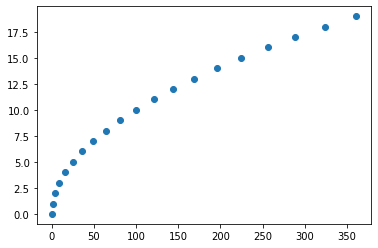

In [62]:
plt.scatter(data['Vgs'], data['Ids'])

In [64]:
data['Vgs']

0       0
1       1
2       4
3       9
4      16
5      25
6      36
7      49
8      64
9      81
10    100
11    121
12    144
13    169
14    196
15    225
16    256
17    289
18    324
19    361
Name: Vgs, dtype: int32

In [80]:
def slope_egofet(data, slope_point = None):
    if slope_point:
        return np.gradient(data['Ids'],data['Vgs'])[data[data['Vgs']==slope_point].index][0]
    else:
        return np.gradient(data['Ids'],data['Vgs'])[np.max(data['Ids'])]

In [81]:
slope_egofet(data, slope_point = 361)

0.02702702702702703

In [69]:
[data[data['Vgs']==361].index]

[Index([19], dtype='int64')]

In [70]:
np.gradient(data['Ids'],data['Vgs'])

array([1.        , 0.83333333, 0.28333333, 0.17619048, 0.12896825,
       0.1020202 , 0.08449883, 0.07216117, 0.0629902 , 0.05589955,
       0.05025063, 0.04564276, 0.04181159, 0.0385755 , 0.03580551,
       0.03340749, 0.03131109, 0.02946269, 0.02782068, 0.02702703])

In [68]:
slope_egofet(data)

0.02702702702702703

In [13]:
len(pd.concat([pd.Series(x[0]['Id1'].loc[0]),pd.Series(x[1])]))

23

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
x = np.arange(20)
y = x**2

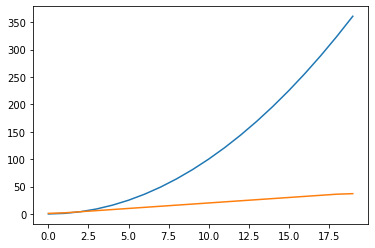

In [28]:
plt.plot(y)
plt.plot(gradient)

In [27]:
gradient = np.gradient(y,x)